In [1]:
import mysql.connector as sql
import pandas as pd
from configparser import ConfigParser


In [2]:
parser = ConfigParser()
parser.read('gcloud.conf')

host  =  parser.get('db', 'host')
db    =  parser.get('db', 'db')
user  =  parser.get('db', 'user')
passw =  parser.get('db', 'user')


db_connection = sql.connect(host=host, database=db, user=user, password=passw)
db_cursor = db_connection.cursor()
query = "SELECT * FROM all_physical limit 60000"


In [3]:
pdata = pd.read_sql(query, db_connection)

In [6]:
catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)
print(len(NumFeatures), "Continuous Features \n", NumFeatures)
print("\n \n")
print(len(catFeatures), "Categorical features \n\n\n", catFeatures)


NumFeatures.remove("Timestamp")
print("\n \n")

print(len(NumFeatures), "Upadated List of Continuous Features \n", NumFeatures)
print("\n \n")

52 Continuous Features 
 ['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603']

 

1 Categorical features 


 ['EVENT']

 

51 Upadated List of Continuous Features 
 ['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT5

In [7]:
pdata.isnull().values.any()
data_cor = pdata[NumFeatures].corr()
# Set the threshold and add to pairs to list
t = 0.8
cor_list = []


In [8]:
pdata[NumFeatures] = pdata[NumFeatures].apply(pd.to_numeric)

# Statistics for the data
### Mean, Median snd Std. dev. etc.

In [9]:
pdata[NumFeatures].describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0
mean,1.842321,601.777750,1.71500,1.748417,1.007417,260.524338,8.381677,328.270741,1.831637,1.744283,...,0.303546,1.990667,1.0,246.962355,1.369059,186.362580,0.020794,1.0,1.011350,1.0
std,1.136608,114.403883,0.46283,0.433927,0.085801,2.086373,0.141260,5.357733,1.059642,0.446910,...,0.029473,0.096158,0.0,7.948413,0.344478,5.014184,0.177648,0.0,0.105931,0.0
min,0.000000,488.068800,0.00000,1.000000,1.000000,257.658300,6.000000,314.842300,0.000000,0.000000,...,0.000000,1.000000,1.0,163.884300,0.000000,134.468700,0.000000,1.0,1.000000,1.0
25%,0.000000,511.463400,1.00000,1.000000,1.000000,258.459400,8.367598,325.993300,0.404062,1.000000,...,0.305608,2.000000,1.0,246.955900,1.009195,186.218300,0.000064,1.0,1.000000,1.0
50%,2.503603,533.091700,2.00000,2.000000,1.000000,259.997400,8.376249,330.402500,2.439881,2.000000,...,0.306569,2.000000,1.0,247.580700,1.569859,186.650900,0.000128,1.0,1.000000,1.0
75%,2.577267,703.772500,2.00000,2.000000,1.000000,262.560900,8.404448,331.966200,2.445263,2.000000,...,0.306761,2.000000,1.0,248.189600,1.649953,187.163500,0.000128,1.0,1.000000,1.0
max,2.698972,925.032300,2.00000,2.000000,2.000000,266.085600,8.470778,337.631400,2.804857,2.000000,...,0.310989,2.000000,1.0,251.522000,1.970333,190.367900,1.742287,1.0,2.000000,1.0


In [10]:
pdata['EVENT'] = pdata['EVENT'].astype('category')

In [11]:
pdata['EVENT'].dtype

category

# Target Variable

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

###Distribution on Loss Value 
#P = plt.figure(figsize = (15,10))
#H = plt.hist(pdata["EVENT"])
#plt.xlabel("Event")
#plt.ylabel("Count")
#plt.title("Histogram for Attacks")

# Features with Correlation Higher Than .95!!

In [30]:
data_cor = pdata[NumFeatures].corr()
# Set the threshold and add to pairs to list
t = 0.95
cor_list = []

#Find Pairs and update cor_list
for i in range(0,51):
    for j in range(i+1,51):
        if (data_cor.iloc[i,j] >= t and data_cor.iloc[i,j] < 1) or (data_cor.iloc[i,j] < 0 and data_cor.iloc[i,j] <= -t):
            cor_list.append([data_cor.iloc[i,j],i,j])

#Sort by corr coef
sorted_list = sorted(cor_list,key=lambda x: -abs(x[0]))

for v,i,j in sorted_list:
    print ("%s and %s = %.5f" % (NumFeatures[i],NumFeatures[j],v))



FIT503 and FIT504 = 0.99895
PIT501 and PIT503 = 0.99829
UV401 and P501 = 0.99820
FIT201 and P205 = 0.99482
FIT503 and PIT501 = 0.99327
P203 and P205 = 0.99137
P101 and P205 = 0.99071
FIT504 and P501 = 0.99015
FIT503 and P501 = 0.99000
FIT504 and PIT501 = 0.98977
P101 and FIT201 = 0.98950
FIT501 and FIT504 = 0.98910
UV401 and FIT504 = 0.98837
UV401 and FIT503 = 0.98823
FIT501 and FIT503 = 0.98732
P101 and MV201 = 0.98690
FIT503 and PIT503 = 0.98651
FIT201 and P203 = 0.98627
FIT501 and P501 = 0.98507
AIT402 and AIT502 = 0.98412
UV401 and FIT501 = 0.98327
P501 and PIT501 = 0.98262
P101 and P203 = 0.98214
FIT504 and PIT503 = 0.98150
UV401 and PIT501 = 0.98091
MV201 and P205 = 0.98069
FIT301 and P302 = 0.97540
P501 and PIT503 = 0.97344
FIT501 and PIT501 = 0.97234
MV201 and P203 = 0.97223
UV401 and PIT503 = 0.97175
FIT201 and MV201 = 0.97097
FIT101 and MV101 = 0.96394
FIT501 and PIT503 = 0.95962
AIT402 and AIT501 = 0.95265
FIT401 and UV401 = 0.95113


### We can observe a very large number of features have strong correlation between them, these relationships need to be explored further. This could mean that we could use much smaller representation of the dataset.


In [16]:
hi_corr_features = []
for v,i,j in sorted_list:
    hi_corr_features.append(i)
    hi_corr_features.append(j)
    
hi_corr_features = list(set(hi_corr_features))

# Histograms for features with highest correlations 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ec5e8eef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9ec6d67080>]], dtype=object)

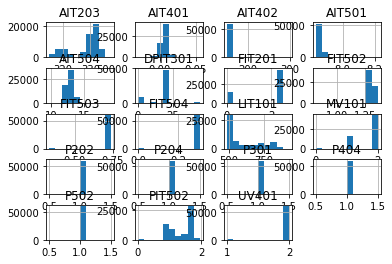

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
pdata.iloc[:,hi_corr_features].hist()

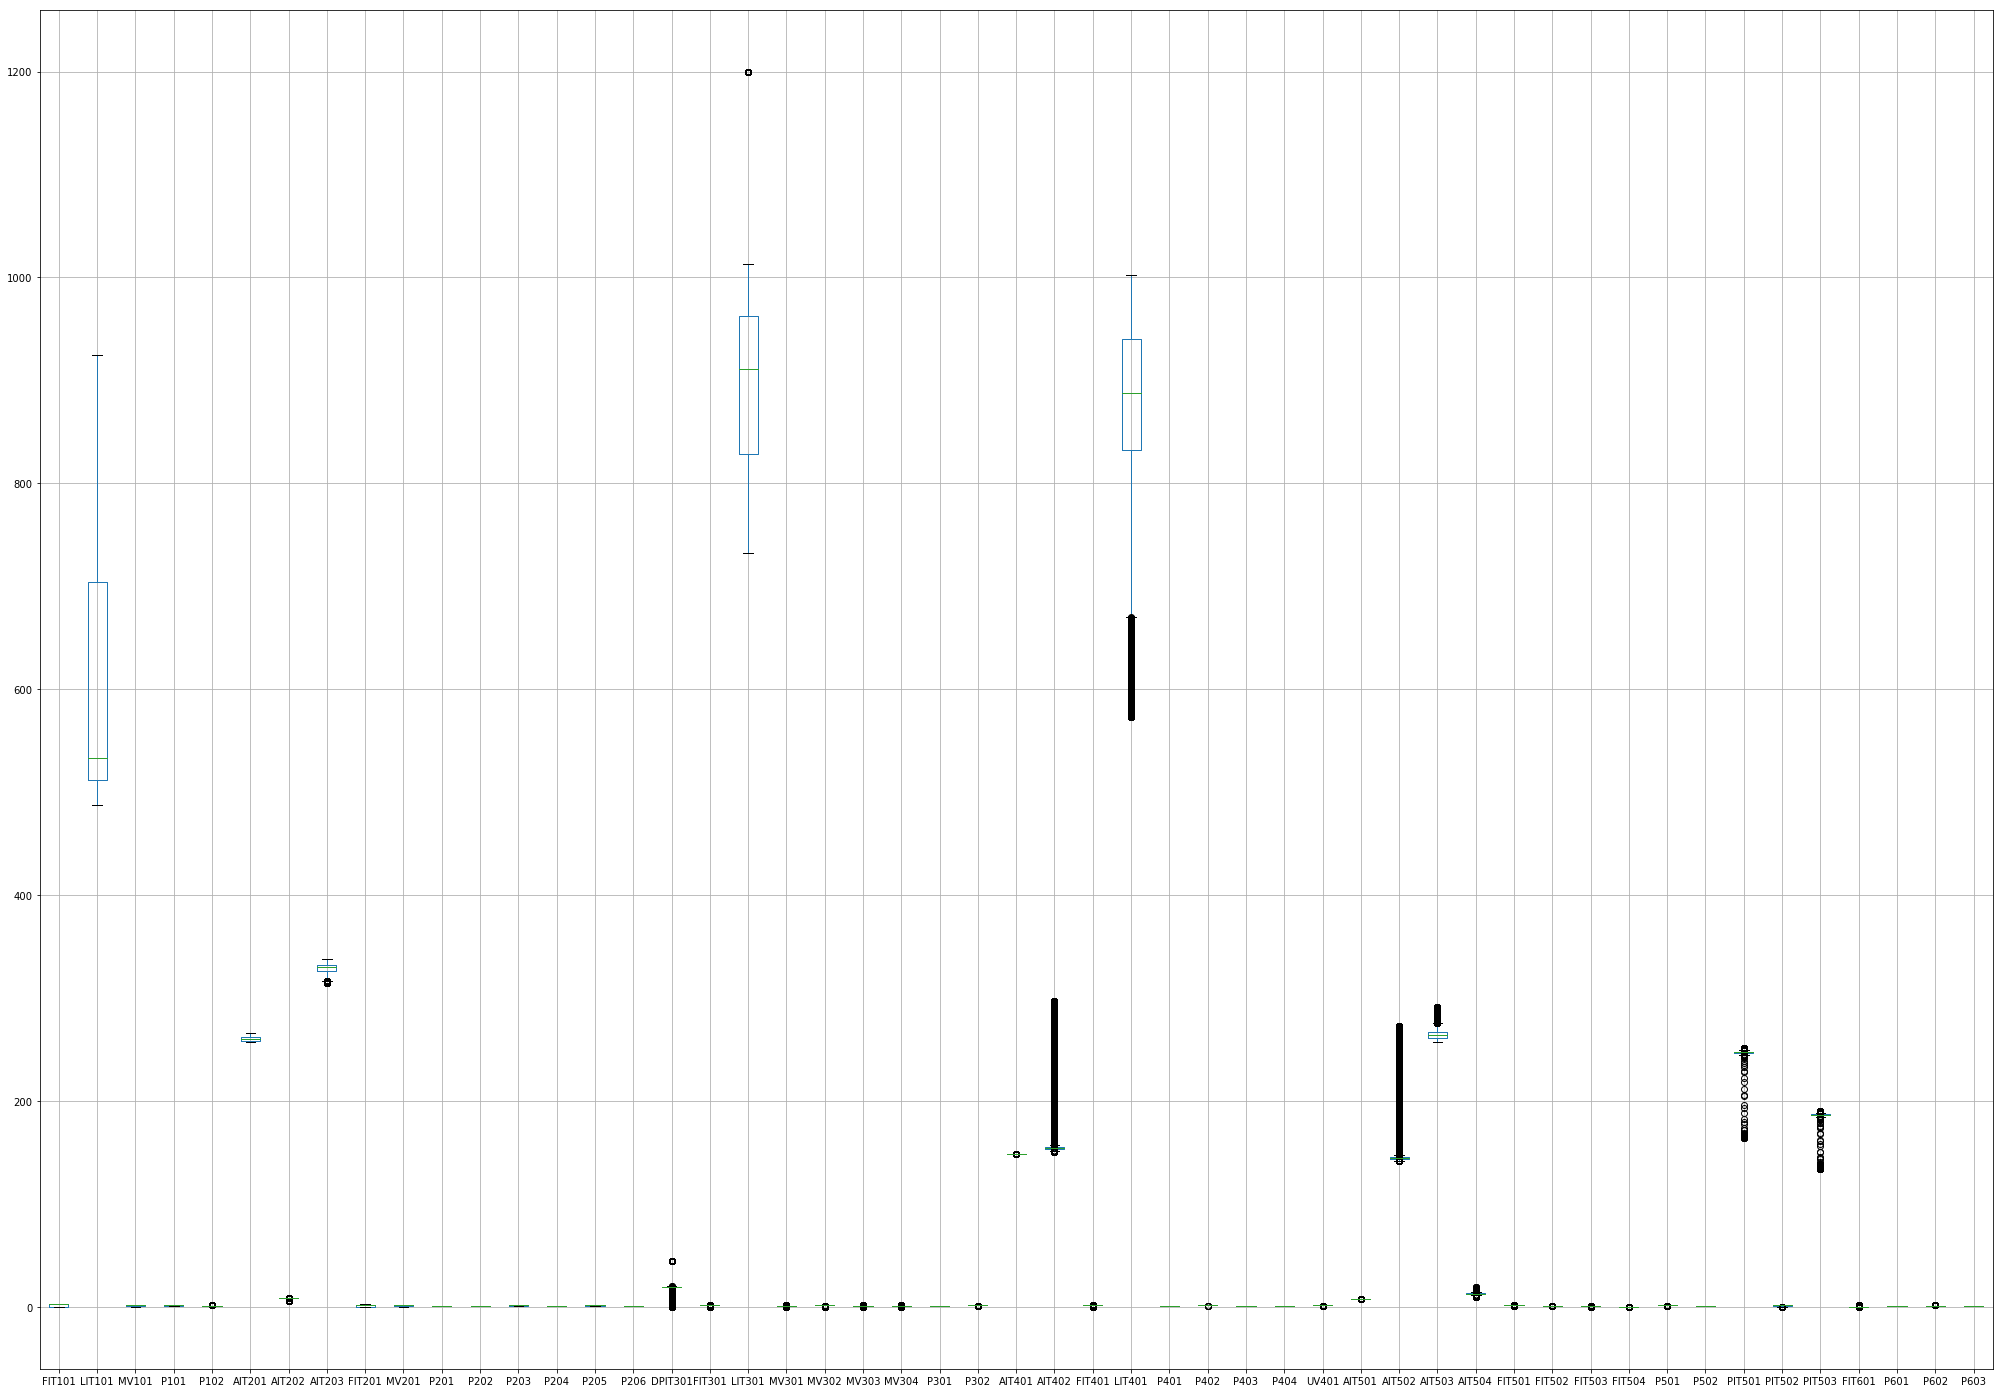

In [57]:
fig, axes = plt.subplots(figsize=(35,  25))
pdata[NumFeatures].boxplot()

#### We can observe that most of the features have a mean around 0.

In [49]:
#While finding corr we only used the NumFeat
hi_corr_features = map(lambda x:x+1, hi_corr_features)

### Let's normalize the data so we can see what is happening here.

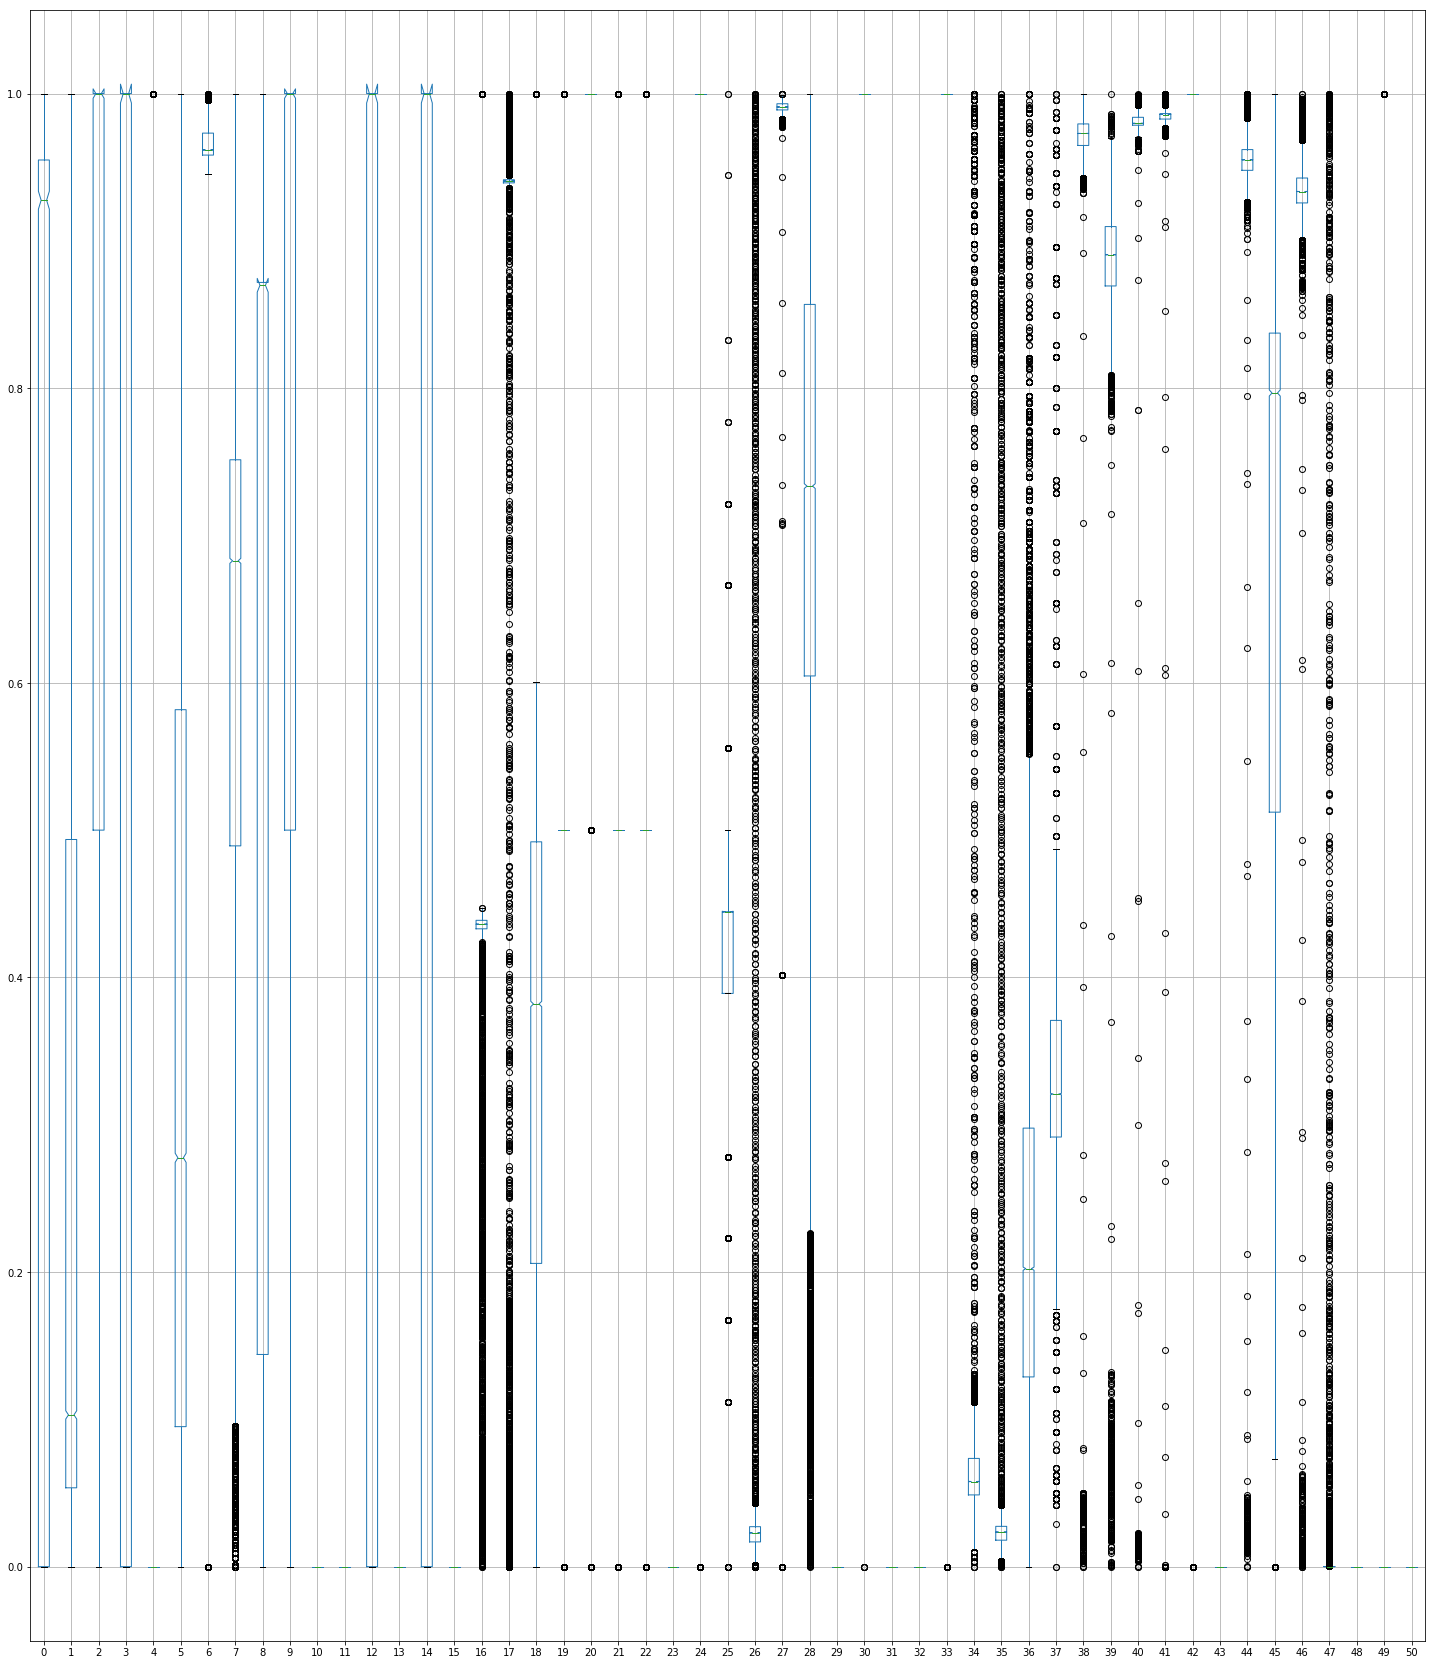

In [73]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(pdata[NumFeatures])
df_normalized = pd.DataFrame(np_scaled)
fig = plt.subplots(figsize=(25,  30))
df_normalized.boxplot(widths = 0.4, notch=True)

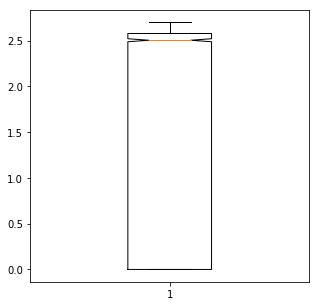

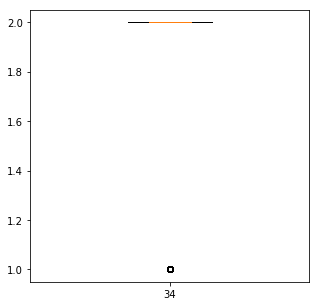

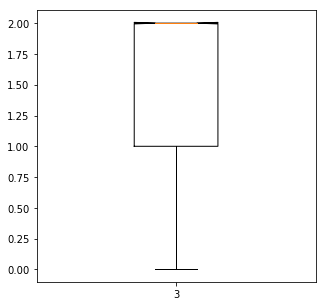

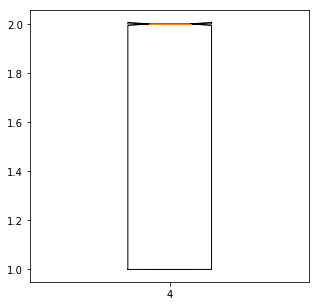

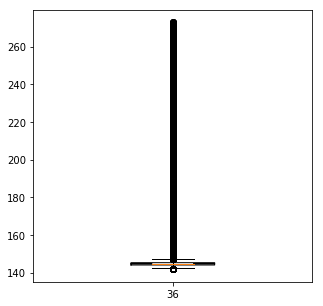

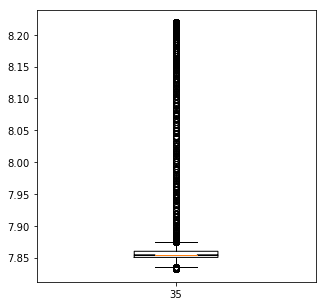

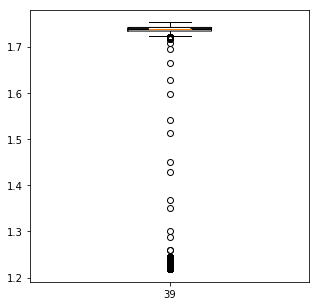

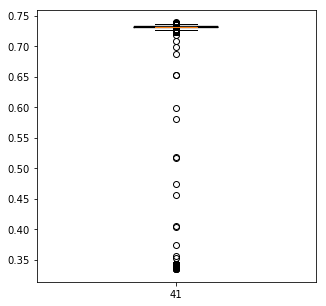

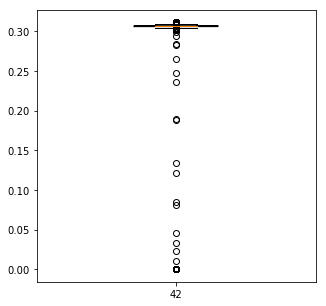

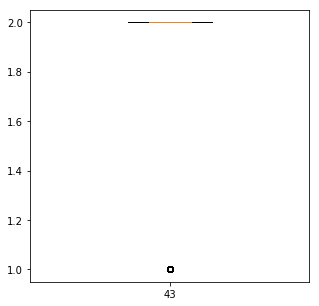

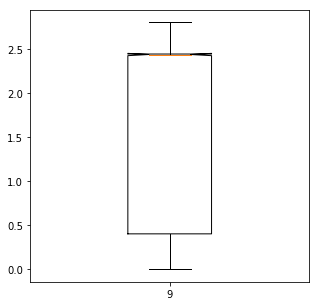

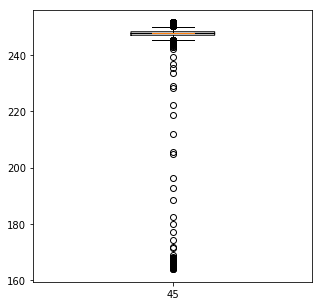

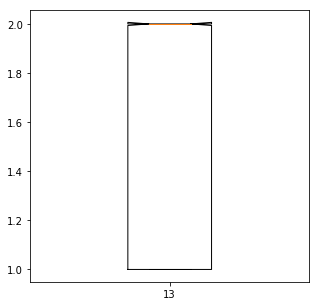

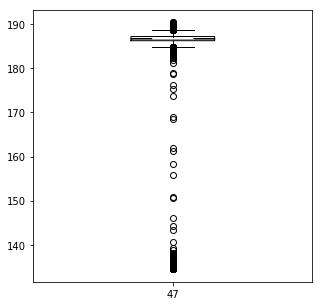

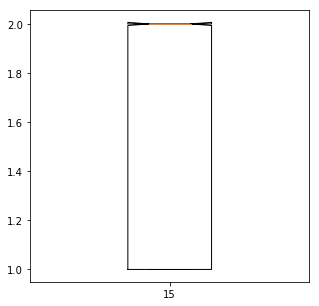

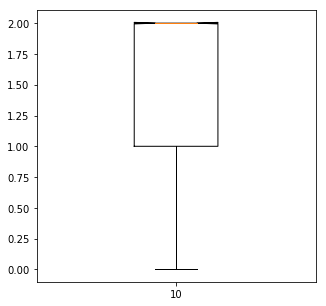

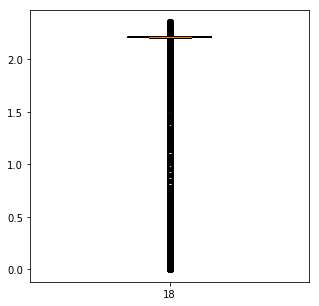

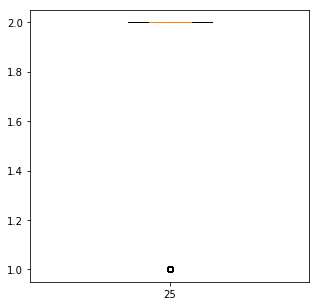

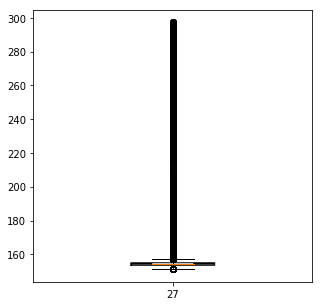

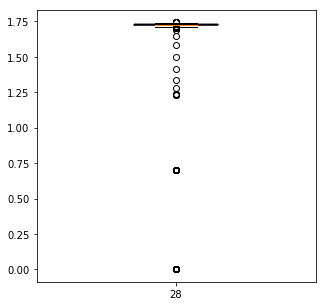

In [50]:
import matplotlib.ticker as ticker

pdata[NumFeatures] = pdata[NumFeatures].apply(pd.to_numeric)

for i in hi_corr_features:
    fig, axes = plt.subplots(figsize=(5,  5))
    plt.boxplot(pdata.iloc[:,i].astype(float), widths = 0.3, notch=True, positions = [i])